In [183]:
import numpy as np
import pandas as pd
import h5py
import random
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# elegans, sapiens, mus = 0, 1, 2

elegans_sample = []

elegans = h5py.File("/content/drive/MyDrive/per-protein_Caenorhabditis elegans.h5", "r")
print(f"C.elegans - number of entries: {len(elegans.items())}")
for sequence_id, _ in elegans.items():
    embedding = elegans.get(sequence_id)[()]
    elegans_sample.append([sequence_id, embedding, 0])

C.elegans - number of entries: 19836


In [186]:
sapiens_sample = []

sapiens = h5py.File("/content/drive/MyDrive/per-protein_Homo sapiens.h5", "r")
print(f"Homo sapiens - number of entries: {len(sapiens.items())}")
for sequence_id, _ in sapiens.items():
    embedding = sapiens.get(sequence_id)[()]
    sapiens_sample.append([sequence_id, embedding, 1])

Homo sapiens - number of entries: 20605


In [187]:
mus_sample = []

mus = h5py.File("/content/drive/MyDrive/per-protein_Mus musculus.h5", "r")
print(f"Mus musculus - number of entries: {len(mus.items())}")
for sequence_id, _ in mus.items():
    embedding = mus.get(sequence_id)[()]
    mus_sample.append([sequence_id, embedding, 2])

Mus musculus - number of entries: 21985


In [188]:
elegans_sample = random.sample(elegans_sample, k=5000)
sapiens_sample = random.sample(sapiens_sample, k=5000)
mus_sample = random.sample(mus_sample, k=5000)

X = elegans_sample + sapiens_sample + mus_sample

In [189]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=64)

In [190]:
x_train = []
for i in X_train:
  x_train.append(i[1])
x_train = np.array(x_train)

In [191]:
x_train.shape

(12000, 1024)

In [192]:
x_test = []
for i in X_test:
  x_test.append(i[1])
x_test = np.array(x_test)

In [193]:
Y_train = []
for i in X_train:
  Y_train.append(i[2])
Y_train = np.array(Y_train)

In [194]:
Y_test = []
for i in X_test:
  Y_test.append(i[2])
Y_test = np.array(Y_test)

In [195]:
x_train = x_train.reshape(-1, 1, 1024)
x_test  = x_test.reshape(-1, 1, 1024)
# Y_train = Y_train.reshape(-1, 1, 1)
# Y_test = Y_test.reshape(-1, 1, 1)

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

##RNN

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
import tensorflow

Epoch 1/30
141/141 [==============================] - 2s 7ms/step - loss: 0.6257 - acc: 0.6583 - val_loss: 0.5573 - val_acc: 0.6657
Epoch 2/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5295 - acc: 0.6918 - val_loss: 0.5434 - val_acc: 0.6860
Epoch 3/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5139 - acc: 0.6997 - val_loss: 0.5434 - val_acc: 0.6810
Epoch 4/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5057 - acc: 0.7090 - val_loss: 0.5476 - val_acc: 0.6787
Epoch 5/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4998 - acc: 0.7113 - val_loss: 0.5427 - val_acc: 0.6830
Epoch 6/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4927 - acc: 0.7182 - val_loss: 0.5471 - val_acc: 0.6813
Epoch 7/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4873 - acc: 0.7251 - val_loss: 0.5610 - val_acc: 0.6787
Epoch 8/30
141/141 [==============================] - 1s 5ms/step - loss: 0.

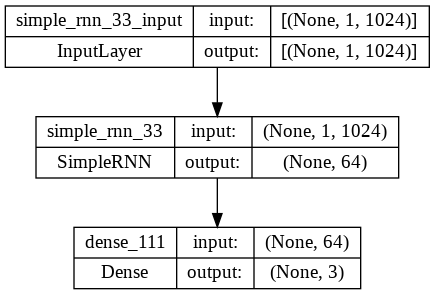

In [197]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hidden_units = 64

model = Sequential()
model.add(SimpleRNN(hidden_units, input_shape=(1,1024)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, Y_train, epochs=30, batch_size=64, validation_split=0.25, callbacks=[early_stopping])
plot_model(model, to_file='rnn_shapes.png', show_shapes=True)

In [198]:
model.evaluate(x_test, Y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.5653 - acc: 0.6890


[0.5653226971626282, 0.6890000104904175]

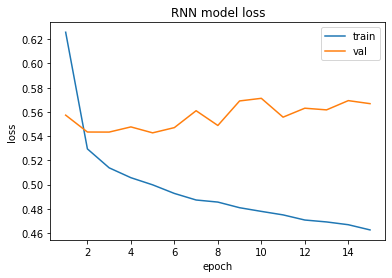

<Figure size 432x288 with 0 Axes>

In [199]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig('rnn_loss.jpg')

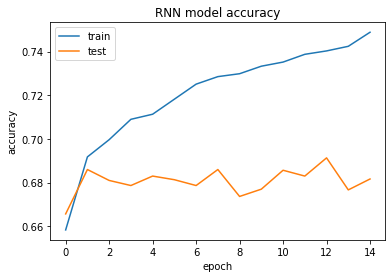

<Figure size 432x288 with 0 Axes>

In [200]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('rnn_acc.jpg')

## LSTM

Epoch 1/30
141/141 [==============================] - 3s 8ms/step - loss: 0.6717 - acc: 0.6592 - val_loss: 0.5655 - val_acc: 0.6613
Epoch 2/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5319 - acc: 0.6940 - val_loss: 0.5447 - val_acc: 0.6790
Epoch 3/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5165 - acc: 0.6974 - val_loss: 0.5405 - val_acc: 0.6830
Epoch 4/30
141/141 [==============================] - 1s 5ms/step - loss: 0.5070 - acc: 0.7049 - val_loss: 0.5417 - val_acc: 0.6777
Epoch 5/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4992 - acc: 0.7152 - val_loss: 0.5517 - val_acc: 0.6727
Epoch 6/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4936 - acc: 0.7193 - val_loss: 0.5491 - val_acc: 0.6773
Epoch 7/30
141/141 [==============================] - 1s 5ms/step - loss: 0.4868 - acc: 0.7238 - val_loss: 0.5620 - val_acc: 0.6727
Epoch 8/30
141/141 [==============================] - 1s 5ms/step - loss: 0.

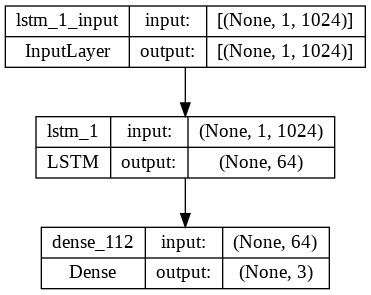

In [201]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(1,1024)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, Y_train, epochs=30, batch_size=64, validation_split=0.25, callbacks=[early_stopping])
plot_model(model, to_file='lstm_shapes.png', show_shapes=True)

In [202]:
model.evaluate(x_test, Y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.5513 - acc: 0.6867


[0.5513275265693665, 0.6866666674613953]

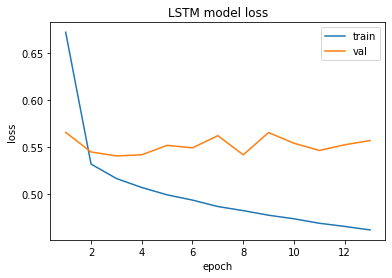

<Figure size 432x288 with 0 Axes>

In [203]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig('lstm_loss.jpg')

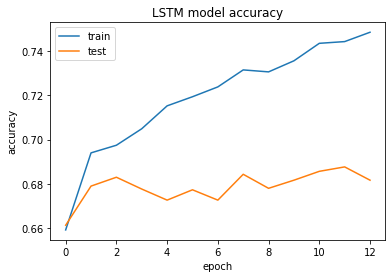

<Figure size 432x288 with 0 Axes>

In [204]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('lstm_acc.jpg')

## Transformer

In [205]:
import tensorflow as tf

In [206]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [207]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [208]:
x_train = x_train.reshape(12000, 1,1024)
x_test  = x_test.reshape(3000, 1,1024)

In [209]:
x_train.shape

(12000, 1, 1024)

In [210]:
embedding_dim = 1024  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 64  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기


inputs = tf.keras.layers.Input(shape=1024)
x = inputs
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

Epoch 1/30
141/141 [==============================] - 5s 23ms/step - loss: 0.7181 - accuracy: 0.6174 - val_loss: 0.5595 - val_accuracy: 0.6343
Epoch 2/30
141/141 [==============================] - 3s 20ms/step - loss: 0.5872 - accuracy: 0.6491 - val_loss: 0.5713 - val_accuracy: 0.6320
Epoch 3/30
141/141 [==============================] - 3s 20ms/step - loss: 0.5730 - accuracy: 0.6451 - val_loss: 0.5686 - val_accuracy: 0.6553
Epoch 4/30
141/141 [==============================] - 3s 21ms/step - loss: 0.5712 - accuracy: 0.6422 - val_loss: 0.5697 - val_accuracy: 0.6280
Epoch 5/30
141/141 [==============================] - 3s 21ms/step - loss: 0.5634 - accuracy: 0.6420 - val_loss: 0.5961 - val_accuracy: 0.6320
Epoch 6/30
141/141 [==============================] - 3s 20ms/step - loss: 0.5554 - accuracy: 0.6487 - val_loss: 0.5757 - val_accuracy: 0.6307
Epoch 7/30
141/141 [==============================] - 3s 21ms/step - loss: 0.5447 - accuracy: 0.6521 - val_loss: 0.6033 - val_accuracy: 0.6403

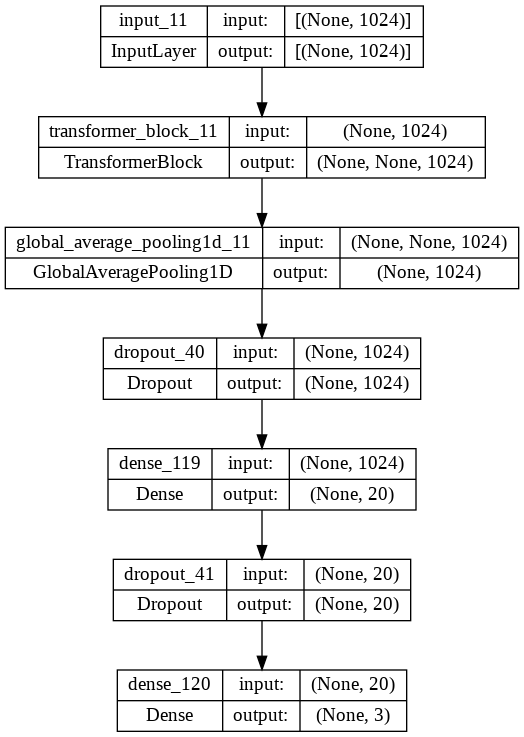

In [211]:
x_train = x_train.reshape(12000, 1024)
x_test  = x_test.reshape(3000, 1024)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, Y_train, epochs=30, batch_size=64, validation_split=0.25, callbacks=[early_stopping])
plot_model(model, to_file='transformer_shapes.png', show_shapes=True)

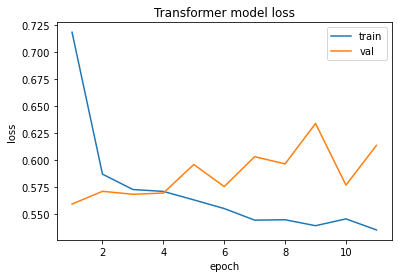

<Figure size 432x288 with 0 Axes>

In [214]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Transformer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig('trans_loss.jpg')

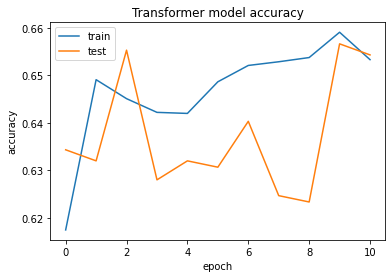

<Figure size 432x288 with 0 Axes>

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transformer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('trans_acc.jpg')

In [217]:
model.evaluate(x_test, Y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.5953 - accuracy: 0.6423


[0.5953361988067627, 0.6423333287239075]

## Test result plotting

In [ ]:
import matplotlib.pyplot as plt

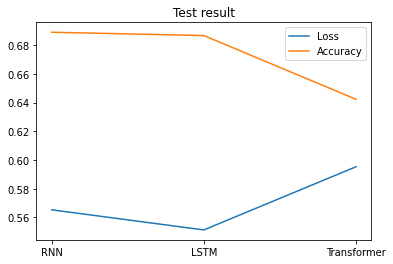

<Figure size 432x288 with 0 Axes>

In [221]:
x = ['RNN', 'LSTM', 'Transformer']
loss = [0.5653, 0.5513, 0.5953]
acc = [0.6890, 0.6867, 0.6423]

plt.plot(x, loss)
plt.plot(x, acc)
plt.title('Test result')

plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()
plt.savefig('test_result.jpg')